In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cv2
import datetime
import cufflinks as cf


from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data, wb

%matplotlib inline

Data Gathering

In [2]:
df = pd.read_csv(r".\data\kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

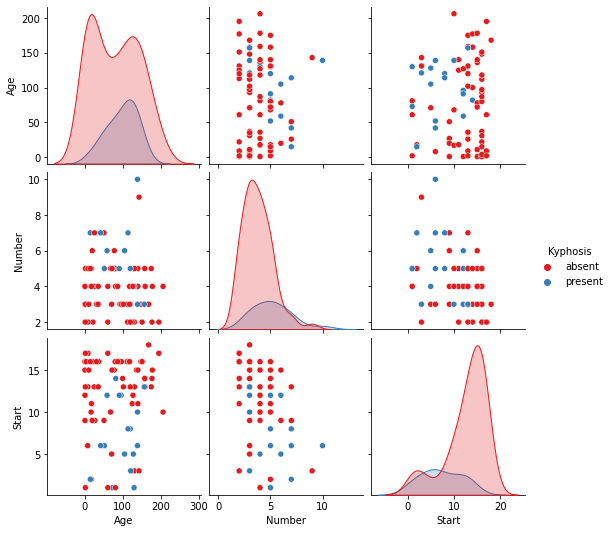

In [7]:
sns.pairplot(data=df, hue="Kyphosis", palette="Set1")

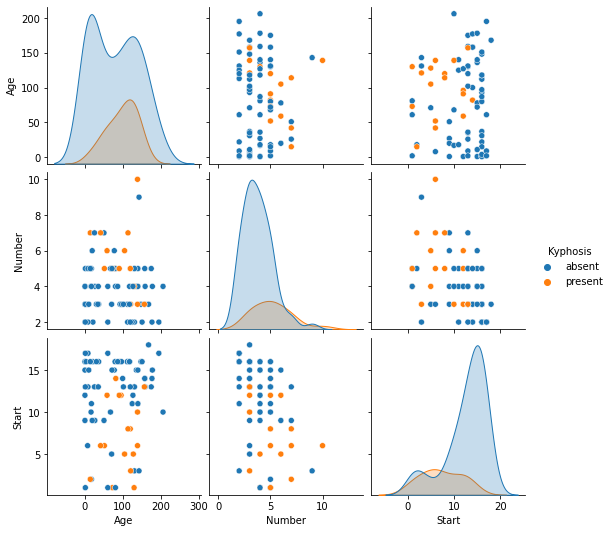

In [8]:
sns.pairplot(df, hue="Kyphosis")

Feature Selections

In [9]:
feature = df.drop(["Kyphosis"], axis=1)

In [10]:
target = df["Kyphosis"]

Spliting Data

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target, test_size=0.3,random_state=101)

In [12]:
xtrain.shape,xtest.shape

((56, 3), (25, 3))

In [13]:
ytrain.shape,ytest.shape

((56,), (25,))

Modeling

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtcm = DecisionTreeClassifier()
dtcm.fit(xtrain,ytrain.values.ravel())

DecisionTreeClassifier()

Predictions and Evaluations

In [18]:
predictions = dtcm.predict(xtest)

Confusion matrix and classifications reports

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



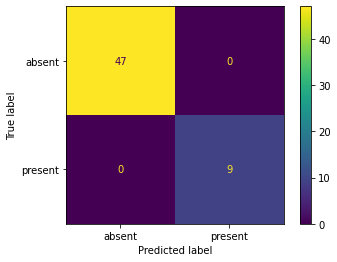

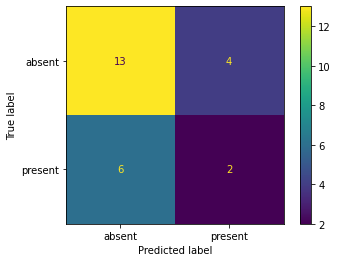

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtcm, xtrain, ytrain)
plot_confusion_matrix(dtcm, xtest, ytest)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix,(ytest,predictions))
print("\n")
print(classification_report(ytest,predictions))

<function confusion_matrix at 0x000001C7B45B1C60> (33     absent
61    present
21    present
32     absent
20     absent
13     absent
52    present
25     absent
22    present
27     absent
30     absent
2     present
67     absent
16     absent
69     absent
6      absent
53     absent
14     absent
48    present
46     absent
26     absent
50     absent
3      absent
37    present
79    present
Name: Kyphosis, dtype: object, array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object))


              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0

In [27]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64